### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* [永豐金證券Python API](https://ai.sinotrade.com.tw/python/Main/index.aspx)申請：  
  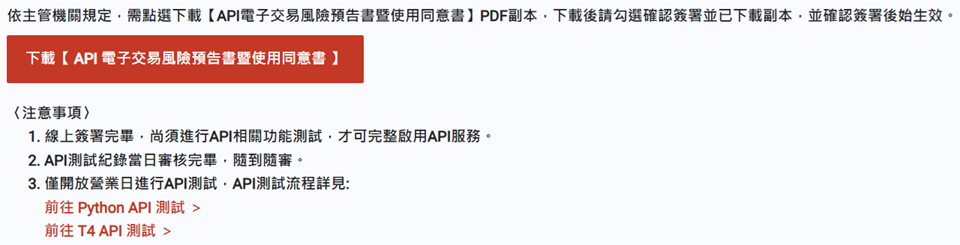  
  申請[API Key](https://www.sinotrade.com.tw/newweb/PythonAPIKey/)後並完成[API測試](https://sinotrade.github.io/zh/tutor/prepare/terms/#api)：  
  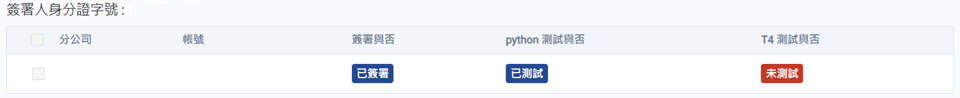  
  
  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdateStockDatabase()

2026-02-23 21:37:44.716 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 
2026-02-23 21:37:45.227 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2026-02-23 21:37:48.821 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:37:52.415 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:37:55.982 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:37:59.545 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:38:03.121 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:38:06.668 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:38:10.220 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:38:15.048 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-23 21:38:18.629 | INFO     | FinMind.data.finmind_api:get_data:171 - download Ta

【新建】日Ｋ：2026-02-23


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


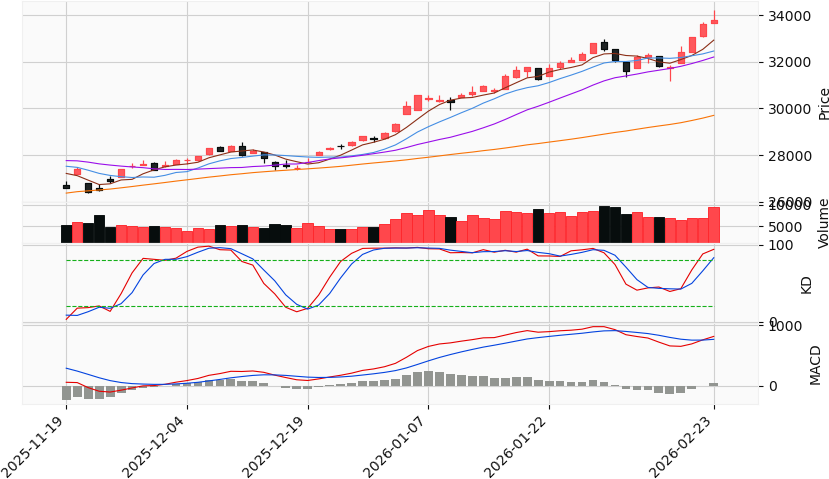

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-02-06 十字線 : 2026-02-06
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 9499.93億元 ，十日均量 ＝ 7636.18億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-26結束。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-09黃金交叉。並且2026-02-23於超買區。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-19當週死亡交叉。並且2026-02-09該週在超買區。
整體評價,"價格趨勢 目前為上漲趨勢，近期K線連續走高並創波段新高，短線多方延續。均線呈現多頭排列，且短期均線上彎並與中期均線維持正乖離，趨勢結構偏強。 價量關係 上漲過程中成交量同步放大，屬於價漲量增，多方推升力道明顯。最新一段拉升伴隨明顯增量，有利於延續攻勢，但也代表短線追價成本提高、波動可能加大。 支撐與壓力 支撐先看約33,600點（近期回檔低點附近），跌破則看約32,900點（短期均線帶附近）作為多方防守區。壓力落在約34,200點（近期高點附近），若能帶量突破並站穩，將有機會打開續漲空間；否則易在此出現震盪整理。 KD 指標解讀 KD位於超買區（>80）且K線高於D線，顯示短線動能仍偏多。惟指標已處高檔，若後續出現K線下彎並跌破D線，將是短線轉為高檔震盪/回檔的警訊。 MACD 指標解讀 DIF線位於MACD線之上，且兩者方向偏上，顯示趨勢仍由多方主導。柱狀體由負轉正並持續擴大，代表上漲動能正在增強，短線偏多格局未被破壞。 綜合評價 整體屬於趨勢偏多、動能轉強的型態，短線仍有續攻條件，但因KD高檔，需留意高位震盪與回檔風險。操作上以守住33,600點與32,900點兩道支撐作為多方續強的關鍵觀察，若量能續強並突破34,200點，多方優勢可望延伸。"


In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


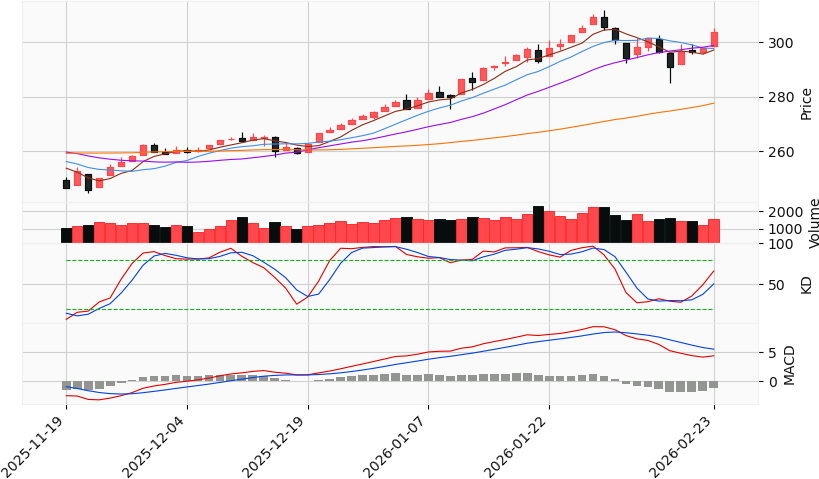

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-02-10 十字線 : 2026-02-10 吞噬 : 2026-02-11
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 1581.34億元 ，十日均量 ＝ 1538.63億元）
型態,反轉型態之頭肩底，型態範圍由2024-11-12開始到2025-12-23結束，估算目標價為346.86點。
移動平均線,5日線上揚、10日線下彎，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-10黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週死亡交叉。
整體評價,價格趨勢 整體仍屬上漲趨勢，近期在高檔出現回檔後再度轉強，收盤重新站回短期均線之上。短期均線上彎、且價格位於中期均線附近偏上，顯示多方結構尚未被破壞。 價量關係 本波反彈上攻時成交量同步放大，屬於價漲量增，對上攻延續性偏正向。先前回檔量能相對收斂，較像是高檔整理中的換手而非失控性出貨。 支撐與壓力 支撐先看約298點（短期均線與近期整理區附近），再看約295點（近幾日回檔低點帶）。壓力先看約305點（近期高點），若能帶量突破，下一道壓力屬於「尚未形成」。 KD 指標解讀 K、D同步上行且K線位於D線之上，動能偏多並延續修復。指標已脫離低檔區並走向中高檔，但尚未進入明顯超買區，短線仍有續攻空間。 MACD 指標解讀 DIF仍在MACD線之下，但兩者差距持續收斂，且柱狀體負值明顯縮小，代表下行動能減弱、趨勢正在回穩。若後續DIF能上穿MACD線並帶動柱狀體翻正，將更有利於波段續強確認。 綜合評價 目前屬於上漲趨勢中的高檔回檔後再轉強，短線偏多但仍需留意上方約305點的壓力帶是否能有效突破。操作上可把298點/295點視為多方防守區，守穩則偏向續抱或逢回分批，跌破則需提高停損/降槓桿的紀律。


In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [7]:
results = analysis.screener()

In [8]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 6530 ， 股票名稱 ＝ 創威 
股票代碼 ＝ 5530 ， 股票名稱 ＝ 龍巖 
股票代碼 ＝ 3702 ， 股票名稱 ＝ 大聯大 
股票代碼 ＝ 4904 ， 股票名稱 ＝ 遠傳 
股票代碼 ＝ 2851 ， 股票名稱 ＝ 中再保 


* 篩選結果  
  - 台船(2208)：盤整觀察   
    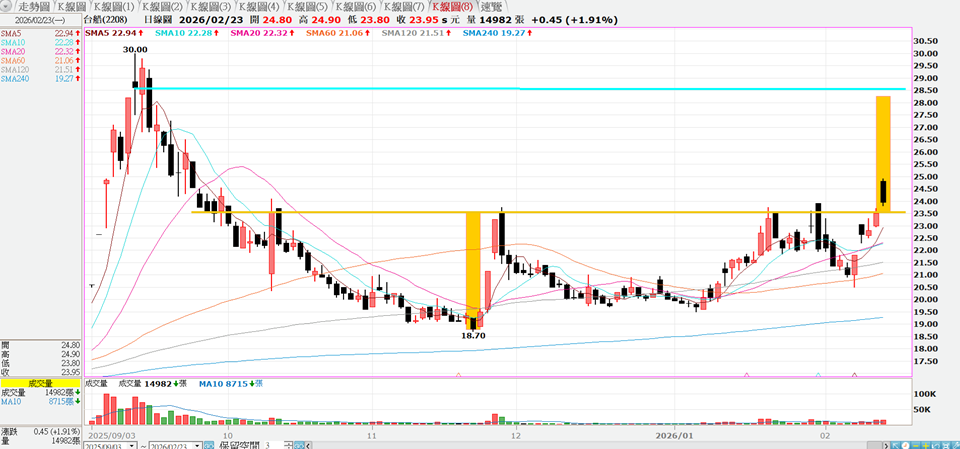   
  - 台橡(2103)：技術突破 
    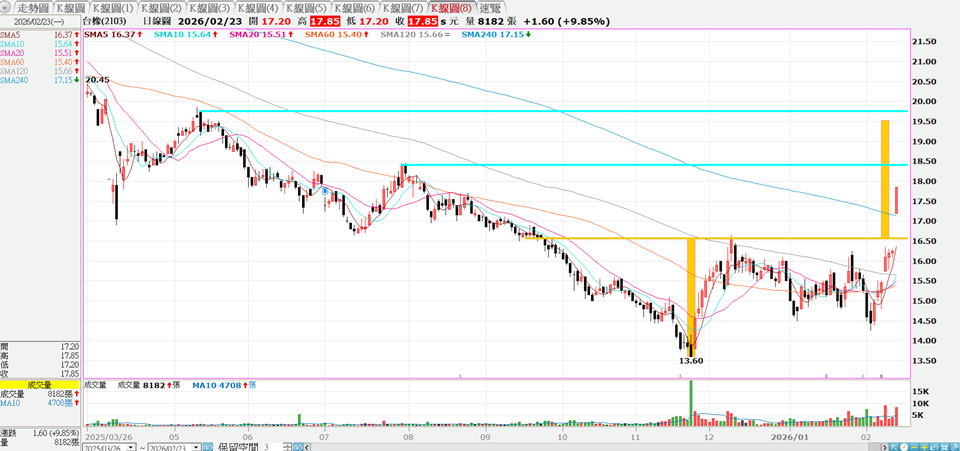   
  - 九齊(6494)：技術突破
    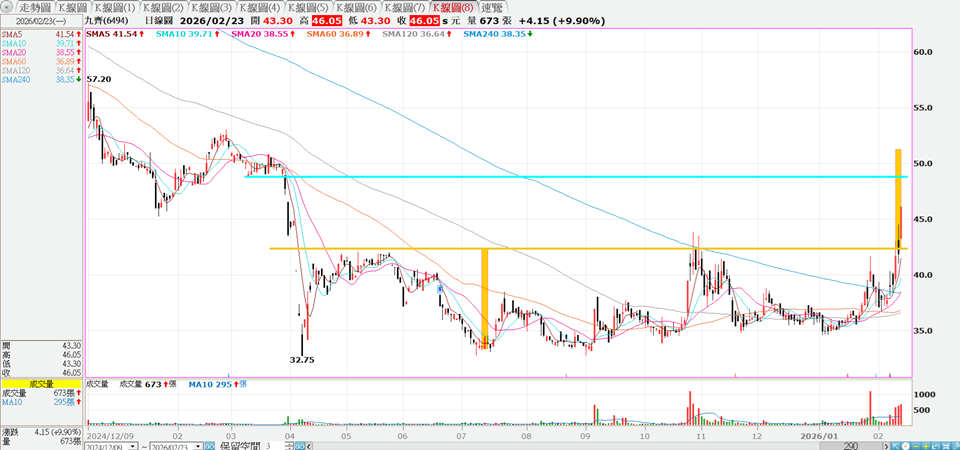   
  - 國際中橡(2104)：盤整觀察  
    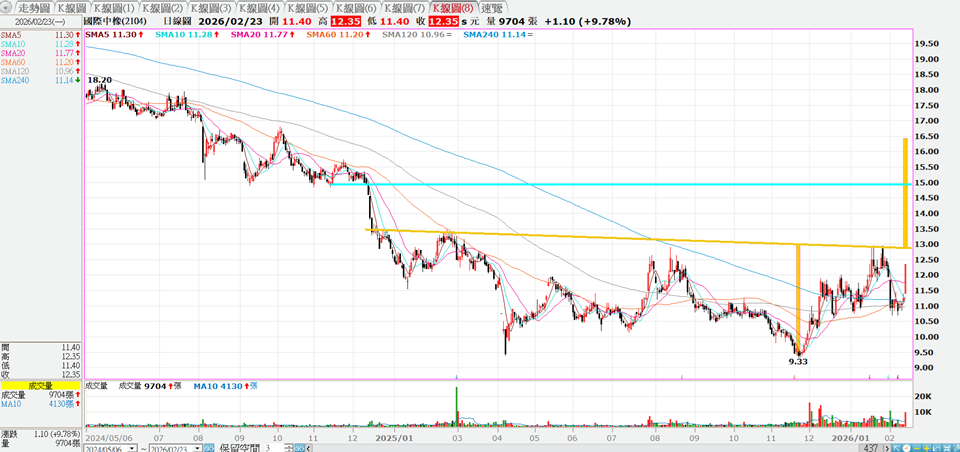     
  - 應廣(6716)：穩健續漲  
    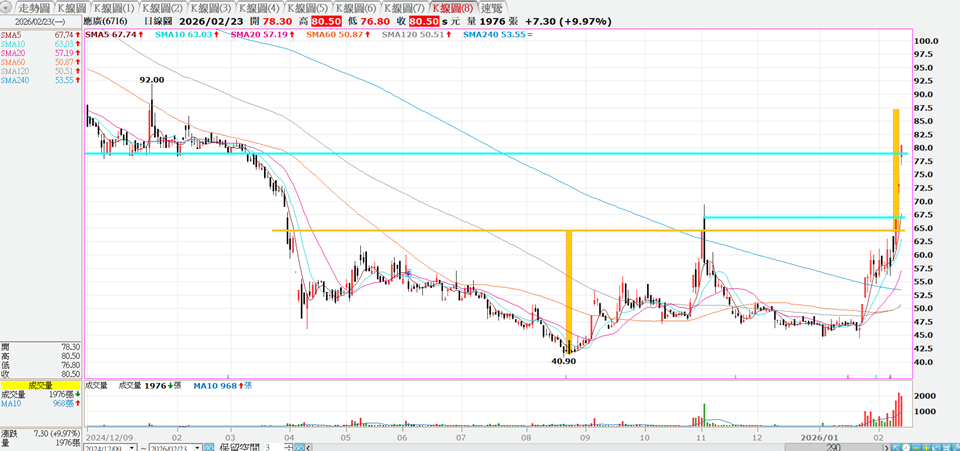   

* 觀察股列表  
  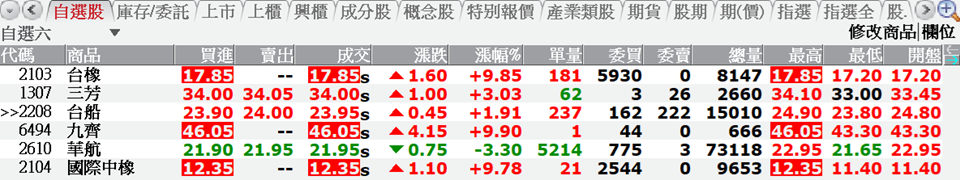  

### 個股解盤  

* 盟立(2464)  
  看法：連兩個交易日下跌後的反彈。  

> **盤後**：量化技術分析  

解盤內容：


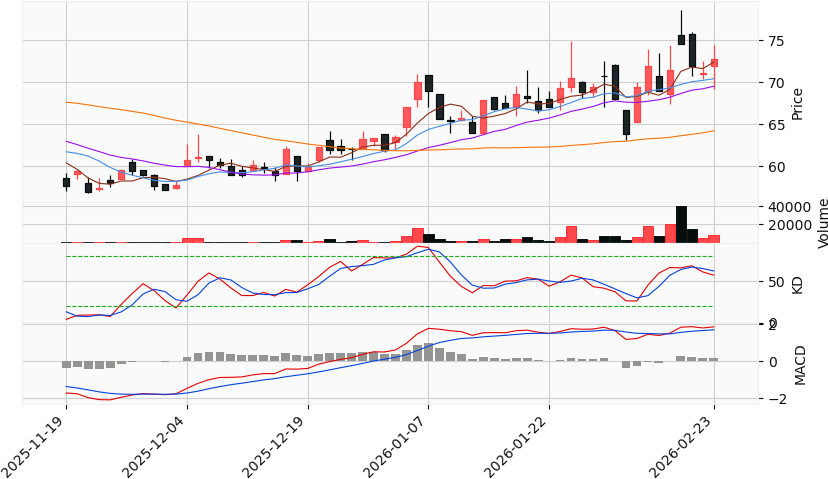

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-02-11 , 2026-02-23 十字線 : 2026-02-11 吞噬 : 2026-02-06"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 8064張 ，十日均量 ＝ 13090張）
型態,反轉型態之雙重頂，型態範圍由2025-07-18開始到2026-02-23結束，估算目標價為35.50元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-02-11死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-02-09當週死亡交叉。
整體評價,價格趨勢 整體仍屬上漲趨勢：價格維持在中期均線之上，短期均線也呈現上彎，顯示多方結構未被破壞。近期高檔出現拉回後再收復，走勢偏向「上漲中的高檔整理」。 價量關係 先前上攻時出現明顯放量，帶動價格快速推升；隨後回檔量能縮減，屬於偏健康的整理型態。近期反彈量能未回到前波大量水準，代表追價動能較前段降溫，短線以震盪換手為主。 支撐與壓力 - 支撐：69.2元～70.4元區間（近期回檔低點帶），跌破則支撐轉弱；次支撐看63.9元～64.2元（中期均線附近）。 - 壓力：74.5元附近（近期高點區），再上方壓力看78.6元附近（前波高點）。 KD指標解讀 KD位於中性偏高區間後回落，且K線落在D線之下，顯示短線動能轉為整理、偏弱震盪。尚未進入超賣區，代表回檔力道目前屬可控，但也不利立即再走急攻。 MACD指標解讀 DIF位於MACD線之上且兩者維持上行架構，趨勢仍偏多。柱狀體維持正值但未明顯放大，顯示多方動能仍在、但推升力道偏「續航」而非「加速」。 綜合評價 目前屬多頭趨勢延續、短線高檔整理格局，操作上以守住69.2元～70.4元支撐作為多方續強關鍵。若能帶量突破74.5元，才有機會再挑戰78.6元；反之跌破支撐，則容易轉為較深的回檔整理。


In [9]:
stock_analysis(analysis,'2464')

籌碼面：  
法人小買(+169)：外資小買(+41)、投信中立(0)、自營大買(+128)。  
主力小賣(-216)。  
分公司買賣家數差分散(-29)。  
融資增(+161)、融券減(-3)。  

* 台船(2208)  
  看法：今天嘗試突破，但收盤時並未有效突破。需確認籌碼。  

> **盤後**：量化技術分析  

解盤內容：


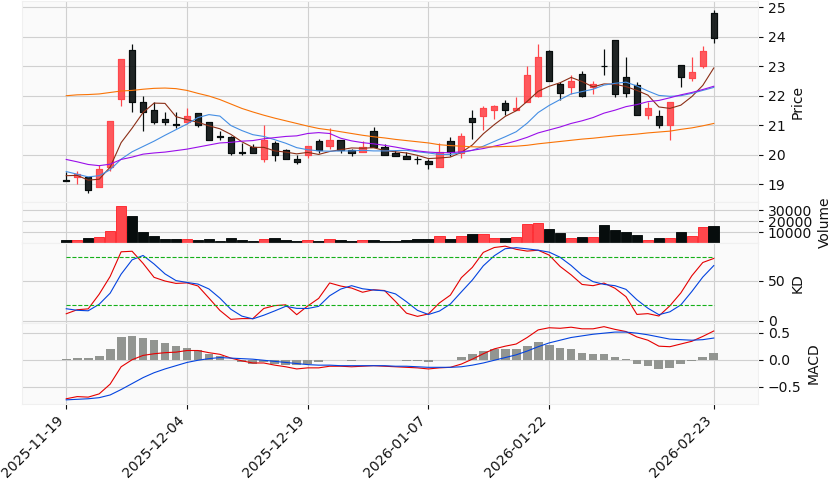

技術分析工具,解盤內容
Ｋ線／Ｋ棒,吞噬 : 2026-02-06
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：大型股爆量（成交量 ＝ 15101張 ，十日均量 ＝ 8727張）
型態,反轉型態之三重底，型態範圍由2025-10-13開始到2026-02-09結束，估算目標價為25.31元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-06黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-02-09當週黃金交叉。
整體評價,價格趨勢 整體走勢偏上漲，近期K線維持在短中期均線之上，均線呈現由短期帶動上彎的結構。最新一根K線衝高後收回，顯示上攻力道仍在，但高檔開始出現震盪與獲利了結壓力。 價量關係 近期上漲段伴隨成交量放大，屬於量能配合的推升型態，對多方延續有利。惟最新一日出現「衝高後回落」且量能仍偏高，代表高檔換手加劇，短線容易轉為震盪整理。 支撐與壓力 支撐先看約23.0元附近（短期均線與近期整理區），跌破則看約22.3元附近（中短期均線帶與前波回檔低點區）。壓力落在約24.9～25.0元（近期高點區），若能帶量站穩，才有機會打開續攻空間。 KD指標解讀 K與D同步上行，且K線維持在D線之上，屬於偏多的動能延續。指標已接近超買區但尚未明顯鈍化，短線仍偏強，不過需留意一旦在高檔出現死亡交叉，回檔幅度可能加大。 MACD指標解讀 DIF線位於MACD線之上，且兩線方向皆向上，顯示趨勢與動能偏多。柱狀體由負轉正並持續放大，代表多方動能正在增強，短線仍有續攻條件，但高檔若柱狀體縮小，將是動能降溫的警訊。 綜合評價 目前屬於多頭趨勢中的高檔震盪：趨勢偏多、量能配合、動能指標仍支持上行，但短線已逼近前高壓力帶，追價風險上升。操作上宜以23.0元附近支撐是否守穩作為強弱分界，守穩偏多續抱；若跌破則需提防回檔擴大並做好停損規劃。


In [10]:
stock_analysis(analysis,'2208')

> **盤後**：底部反轉交易策略分析  

In [11]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-09-30'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-11-27']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為28.30元


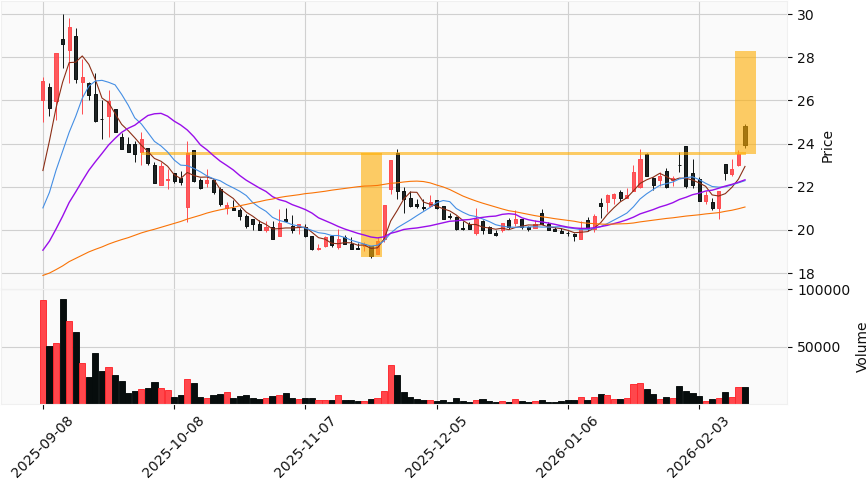

In [12]:
image = mysys.DrawOnKlineChart('2208','2025-09-08','2026-02-23',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-1271)：外資小賣(-1343)、投信中立(0)、自營小買(+72)。  
主力小賣(-1186)。  
分公司買賣家數差集中(+15)。  
融資中立(0)、融券中立(0)。  